In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Load The Dataset**

In [36]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/coffee_sales.csv')
data.shape

(1133, 6)

## **Data Inspection**

In [37]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [39]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


## **Data Preprocessing**

In [40]:
# drop datetime column
data.drop(columns=['datetime'], inplace=True)
data.head()

,date,cash_type,card,money,coffee_name
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte


In [41]:
# check for missing values
data.isnull().sum()

,0
date,0
cash_type,0
card,89
money,0
coffee_name,0


In [42]:
# drop null rows
data.dropna(subset=['card'], inplace=True)
data.isnull().sum()

,0
date,0
cash_type,0
card,0
money,0
coffee_name,0


In [43]:
# check for duplicates values
data.duplicated().sum()

114

In [44]:
# drop duplicates values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [45]:
data['cash_type'].value_counts()

,count
cash_type,
card,930


In [47]:
# There is only card in case type so we can drop this column
data.drop(columns=['cash_type'], inplace=True)

In [48]:
data.shape

(930, 4)

## **Feature Engineering**

In [49]:
data.head()

,date,card,money,coffee_name
0,2024-03-01,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,ANON-0000-0000-0005,33.8,Americano with Milk


In [50]:
data['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,224
Latte,201
Cappuccino,157
Americano,127
Cortado,85
Hot Chocolate,63
Espresso,43
Cocoa,30


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['coffee_name'] = le.fit_transform(data['coffee_name'])
data['card'] = le.fit_transform(data['card'])

data.head()

,date,card,money,coffee_name
0,2024-03-01,0,38.7,7
1,2024-03-01,1,38.7,6
3,2024-03-01,2,28.9,0
4,2024-03-01,3,38.7,7
5,2024-03-01,4,33.8,1


* Americano: 0
* Americano with Milk: 1
* Cappuccino: 2
* Cocoa: 3
* Cortado: 4
* Espresso: 5
* Hot Chocolate: 6
* Latte: 7

In [52]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1132
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         930 non-null    datetime64[ns]
 1   card         930 non-null    int64         
 2   money        930 non-null    float64       
 3   coffee_name  930 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 68.6 KB


In [53]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.drop(columns=['date'], inplace=True)
data.head()

,card,money,coffee_name,year,month,day
0,0,38.7,7,2024,3,1
1,1,38.7,6,2024,3,1
3,2,28.9,0,2024,3,1
4,3,38.7,7,2024,3,1
5,4,33.8,1,2024,3,1


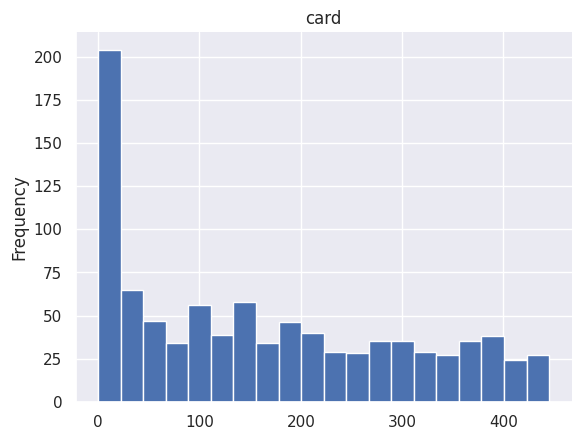

In [57]:
# @title card

from matplotlib import pyplot as plt
data['card'].plot(kind='hist', bins=20, title='card')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Graph Ploting**

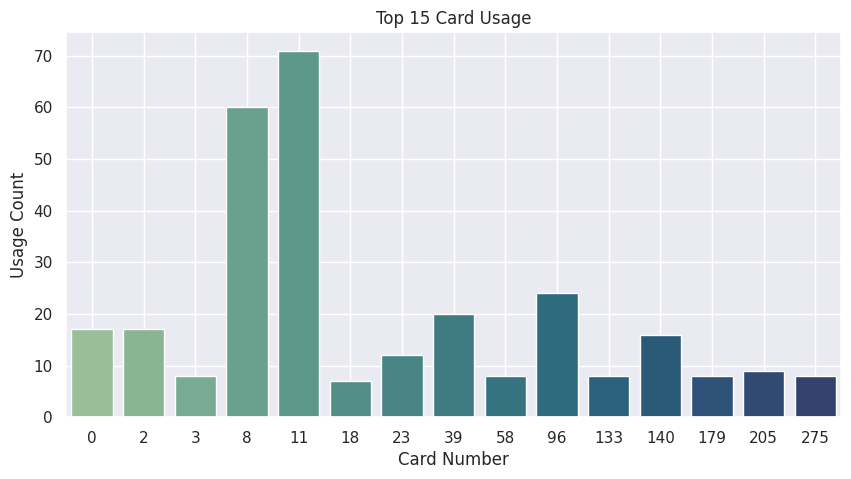

In [108]:
# Top 15 Card Usage
plt.figure(figsize=(10,5))
sns.set_theme()

top_15_cards = data['card'].value_counts().nlargest(15)
sns.barplot(x=top_15_cards.index, y=top_15_cards.values, palette='crest')
plt.title('Top 15 Card Usage')
plt.xlabel('Card Number')
plt.ylabel('Usage Count')
plt.grid(True)
plt.show()